<a href="https://colab.research.google.com/github/eliasssantana/handling_unbalanced_data/blob/main/dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>### Carregamento de dados

In [2]:
import pandas as pd
import random
import numpy as np

In [3]:
dados = pd.read_csv('credit_data.csv')

In [4]:
dados.shape

(2000, 5)

>### Tratamento de dados

In [5]:
dados.isna().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [6]:
dados.dropna(inplace=True)
dados.shape

(1997, 5)

In [7]:
import seaborn as sns

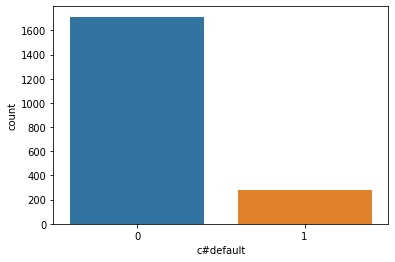

In [8]:
sns.countplot(x = dados['c#default']);

In [9]:
X = dados.iloc[:, 1:4].values

In [10]:
X.shape

(1997, 3)

In [11]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [12]:
y = dados.iloc[:, 4].values

In [13]:
y.shape

(1997,)

>### Base de treinamento e teste


---



In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify=y)

In [16]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [17]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [18]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [19]:
1714 / len(dados), 283 / len(dados)

(0.8582874311467201, 0.14171256885327993)

In [20]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [21]:
1371 / len(y_treinamento), 226 / len(y_treinamento)

(0.8584846587351284, 0.14151534126487164)

In [22]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [23]:
343 / len(y_teste), 57 / len(y_teste)

(0.8575, 0.1425)

> ### Classificação com Naïve Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
modelo = GaussianNB()

In [26]:
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [27]:
previsoes  = modelo.predict(X_teste)

In [28]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [29]:
y_teste

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
resultado = accuracy_score(previsoes, y_teste)

In [32]:
resultado

0.925

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(previsoes, y_teste)

In [35]:
cm

array([[337,  24],
       [  6,  33]])

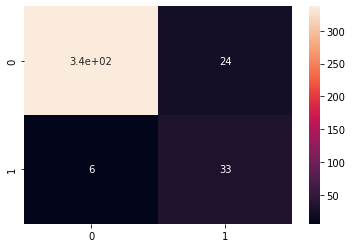

In [36]:
sns.heatmap(cm, annot=True)

In [37]:
(337 + 40) / (337 + 17 + 6 + 40)

0.9425

**Percentual de acerto sobre as pessoas que pagaram o empréstimo de fato**

In [38]:
337 / (337 + 17)

0.9519774011299436

**Percentual de acertos sobre as pessoas que não pagaram o empréstimo**

In [39]:
40 / (40 + 6)

0.8695652173913043

> ### Subamostragem (undersampling) - Tomek links

In [40]:
from imblearn.under_sampling import TomekLinks

In [41]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under= tl.fit_resample(X, y)

In [42]:
X_under, y_under 

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0]))

In [43]:
np.unique(y_under, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([1614,  283])), (array([0, 1]), array([1714,  283])))

In [44]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [45]:
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [46]:
modelo_u = GaussianNB()

In [47]:
modelo_u.fit(X_treinamento_u, y_treinamento_u)

GaussianNB()

In [48]:
previsoes_u = modelo_u.predict(X_teste_u)
previsoes_u

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
accuracy_score(previsoes_u, y_teste_u)

0.9131578947368421

In [50]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[316,  26],
       [  7,  31]])

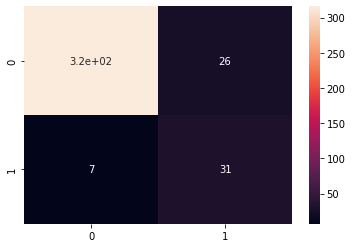

In [51]:
sns.heatmap(cm_u, annot=True)

In [52]:
315 / (315 + 19)

0.9431137724550899

In [53]:
38 / (38 + 8)

0.8260869565217391

>## Sobreamostragem (oversampling) -SMOTE

In [1]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(sampling_strategy="minority")

In [59]:
X_over, y_over = smote.fit_resample(X,y)

In [60]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [63]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [66]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [67]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [68]:
X_treinamento_o.shape, X_teste_o.shape, y_treinamento_o.shape, y_teste_o.shape

((2742, 3), (686, 3), (2742,), (686,))

In [70]:
modelo_o = GaussianNB()

In [72]:
modelo_o.fit(X_treinamento_o, y_treinamento_o)

GaussianNB()

In [74]:
previsoes_o = modelo_o.predict(X_teste_o)

In [77]:
accuracy_score(previsoes_o, y_teste_o)

0.9110787172011662

In [79]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)

In [82]:
cm_o

array([[302,  20],
       [ 41, 323]])

In [84]:
302 / (302 + 20)

0.937888198757764

In [85]:
323 / (323 + 41)

0.8873626373626373